<a href="https://colab.research.google.com/github/syuhraputri27/Data-Science/blob/main/BK_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama  :** Syuhra Putri Ganiswari

**NIM   :** A11.2020.12789

**Kelas :** BKDS01

**Table of Contents**
1. Pengumpulan Data
2. Menelaah Data
3. Validasi Data
4. Menentukan Object Data
5. Membersihkan Data
6. Konstruksi Data
7. Modelling
8. Evaluasi
9. Streamlit
10. Kesimpulan

### 1. Pengumpulan Data

Sumber dataset : https://archive.ics.uci.edu/dataset/45/heart+disease

Dataset yang dipakai : hungarian.data

Deskripsi : heart-disease.names

*maksud dari tahap pengumpulan data disini, selain mendapat dataset yang "sudah jadi" atau tinggal pakai, dataset juga dapat didapatkan menggunakan cara crawling atau scrapping

### 2. Menelaah Data

import library yang diperlukan

In [1]:
import pandas as pd #
import numpy as np #
import itertools

Load Data

In [2]:
# menampung data ke variabel yang akan digunakan menyimpan file 'hungarian.data'
# dir = 'hungarian.data'

# !ls "/content/drive/My Drive/BK" : gunanya buat mengetahui/CEK PATH dimana letak file kita


# menyimpan data path -- upload dataset yang sudah di download terlebih dahulu(local)
# directory = "/content/sample_data/hungarian.data"

# mount drive
directory = "/content/drive/MyDrive/Perkuliahan/Udinus/Semester 7/hungarian-hd/hungarian.data"

In [3]:
# per setiap 76 data berulang, melakukan cek

with open(directory , encoding = 'Latin1') as file :      #membuka file, parameter encoding='Latin1' untuk menentukan pengkodean karakter yang digunakan dalam file
          lines = [line.strip() for line in file]         #(loop list comprehension)lines merupakan list yang menampung setiap baris dalam file, strip() menghapu spasi/tab/newline(/n) tambahan di awal maupun akhir nilai perbaris

lines[0:10]     #menampilkan line ke 0-10

# note :
# Latin1 = di representasikan bilangan bulat 0-255(8 bit). karakter-karakter seperti huruf latin, angka dan tanda baca dan bbrp karakter khusus seperto simbol mata uang dan tanda panah
# hal ini penting supaya file dapat dibaca dengan benar

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

In [4]:
data = itertools.takewhile(
    lambda x: len(x) == 76,     #setiap rentang 76
    (' '.join(lines[i:(i+10)]).split() for i in range(0, len(lines), 10))   #menggabungkan lines ke i sampai i+10, krn i:i+10 1 baris 76
)                                                                           #untuk i dalam rentang 0 sampai panjang lines dengan langkah 10, dilakukan penggabungan dimana dikasi spasi ' ' setiap nilainya, kemudian di split menjadi 1 kata 1 kata

df = pd.DataFrame.from_records(data)    #membuat dataframe

df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


In [5]:
df.info() #cek datatype nilai-nilai di dataframe


# float/integer, gabisa string atau ???
# punya missing value yang banyak, jadinya di drop
# datanya janggal, -9,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

In [6]:
# df.tail()

Ternyata tipe datanya object, sehingga harus diganti menjadi float

In [7]:
df = df.iloc[:,:-1]     # pemilihan subset kolom, memilih semua baris, dan semuakolom kecuali kolom terakhir yg bernilai 'name'
# print(df)
df = df.drop(df.columns[0], axis=1)     # menghapus kolom pertama dimana nilainya adalah id pasien, df.columns[0] => nama kolom pertama, axis=1 => menghapus kolom bukan baris
# print(df)

In [8]:
# mengubah tipe data file dataset menjadi tipe data float sesuai dengan nilai null yaitu -9.0
df = df.astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

### 3. Validasi Data

tujuan dari tahap ini yaitu mengatahui dan memahami isi dari dataset agar dapat dilakukan penanganan sesuai dengan kondisinya.


kondisi dataset hungarian.data yaitu terdapat nilai null yang direpresentasikan dengan angka -9.0, sehingga nilai tersebut diganti menjadi nilai null

In [10]:
df.replace(-9.0, np.nan, inplace=True) # replace -9.0 dengan nilai null

In [11]:
df.isnull().sum() #mengecek jumlah null yang ada di setiap attribut

1       0
2       0
3       0
4       0
5       0
     ... 
70      0
71      0
72      0
73    266
74    294
Length: 74, dtype: int64

In [12]:
df.head()     #mengecek apakah sudah benar nilai -9.0 digantikan dengan nilai null

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,0.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,0.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       0 non-null      float64
 7   8       294 non-null    float64
 8   9       293 non-null    float64
 9   10      293 non-null    float64
 10  11      271 non-null    float64
 11  12      12 non-null     float64
 12  13      1 non-null      float64
 13  14      0 non-null      float64
 14  15      286 non-null    float64
 15  16      21 non-null     float64
 16  17      1 non-null      float64
 17  18      293 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      293 non-null    float64
 22  23

### 4. Menentukan Object Data

In [14]:
# Memilih 14 fitur yang akan digunakan sesuai dengan deskripsi dataset

df_selected = df.iloc[:, [1,2,7,8,10,14,17,30,36,38,39,42,49,56]]

df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


In [15]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       294 non-null    float64
 1   3       294 non-null    float64
 2   8       294 non-null    float64
 3   9       293 non-null    float64
 4   11      271 non-null    float64
 5   15      286 non-null    float64
 6   18      293 non-null    float64
 7   31      293 non-null    float64
 8   37      293 non-null    float64
 9   39      294 non-null    float64
 10  40      104 non-null    float64
 11  43      4 non-null      float64
 12  50      28 non-null     float64
 13  57      294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


mengganti nama kolom yang awalnya angka menjadi sesuai dengan yang ada di deskripsi dataset

In [16]:
column_mapping = {
    2 : 'age',
    3 : 'sex',
    8 : 'cp',
    9 : 'trestbps',
    11 : 'chol',
    15 : 'fbs',
    18 : 'restecg',
    31 : 'thalach',
    37 : 'exang',
    39 : 'oldpeak',
    40 : 'slope',
    43 : 'ca',
    50 : 'thal',
    57 : 'target',
}

df_selected.rename(columns=column_mapping, inplace=True)

<ipython-input-16-789a91ef96c3>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_mapping, inplace=True)


In [17]:
df_selected.info()    #mengecek apakah sudah terubah

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        4 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


In [18]:
#note
# replace missing value, jumlahkan semua yg ada , nilai rata rata dari missing value dimasukkan kesana
# duplicate bisa jadi overfitting
# jadi dihapus yang duplikat


menghitung jumlah fitur pada dataset

In [19]:
df_selected.value_counts()

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   thal  target
47.0  1.0  4.0  150.0     226.0  0.0  0.0      98.0     1.0    1.5      2.0    0.0  7.0   1.0       1
dtype: int64

### 5. Membersihkan Data

supaya model yang dibangun lebih akurat, maka sebelum melakukan pemodelan dilakukan pembersihan data

menghitung nilai null

In [20]:
df_selected.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

ternyata terdapat beberapa fitur yang hampir 90% nya berisikan nilai null, sehingga perlu di drop

In [21]:
# df_selected

In [22]:
columns_to_drop = ['ca', 'slope', 'thal']
df_selected = df_selected.drop(columns_to_drop, axis=1)

In [23]:
df_selected.isnull().sum()

age          0
sex          0
cp           0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
target       0
dtype: int64

karna masih ada null di kolom fitur, maka dilakukan pengisian nilai null menggunakan nilai mean pada setiap kolomnya

In [24]:
meanTBPS = df_selected['trestbps'].dropna()
meanChol = df_selected['chol'].dropna()
meanfbs = df_selected['fbs'].dropna()
meanRestCG = df_selected['restecg'].dropna()
meanthalach = df_selected['thalach'].dropna()
meanexang = df_selected['exang'].dropna()

In [25]:
meanTBPS = meanTBPS.astype(float)
meanChol = meanChol.astype(float)
meanfbs = meanfbs.astype(float)
meanRestCG = meanRestCG.astype(float)
meanthalach = meanthalach.astype(float)
meanexang = meanexang.astype(float)

dilakukan pembulatan nilai

In [26]:
meanTBPS = round(meanTBPS.mean())
meanChol = round(meanChol.mean())
meanfbs = round(meanfbs.mean())
meanRestCG = round(meanRestCG.mean())
meanthalach = round(meanthalach.mean())
meanexang = round(meanexang.mean())

mengubah nilai null menjadi nilai mean yang sudah ditentukan sebelumnya

In [27]:
fill_values = {'trestbps':meanTBPS, 'chol':meanChol, 'fbs':meanfbs, 'restecg':meanRestCG, 'thalach':meanthalach, 'exang':meanexang }

dfClean = df_selected.fillna(value=fill_values)   #nilai-nilai mean yg baru, ditampung dalam variabel dfClean

In [28]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  target    294 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


In [29]:
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

cek duplikasi data

In [30]:
# mengetahui rows mana yang duplikat
duplicate_rows = dfClean.duplicated()
dfClean[duplicate_rows]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [31]:
# menampilkan semua rows yang duplikat
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


menghapus data duplikat

In [32]:
dfClean = dfClean.drop_duplicates()
print("All Duplicate Rows")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


dari dataframe diatas diketahui bahwa data duplikat sudah tidak ada

In [33]:
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


In [34]:
dfClean['target'].value_counts()

0.0    187
1.0     37
3.0     28
2.0     26
4.0     15
Name: target, dtype: int64

melakukan visualisasi untuk mengetahui korelasi antar fitur

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
dfClean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
age,1.000000,0.014516,0.146616,0.246571,0.087101,0.181130,0.050672,-0.460514,0.239223,0.178172,0.210429
sex,0.014516,1.000000,0.245769,0.082064,0.027695,0.044372,-0.108656,-0.106959,0.154925,0.115959,0.220732
cp,0.146616,0.245769,1.000000,0.081293,0.134697,0.031930,-0.016372,-0.367819,0.494674,0.351735,0.427536
trestbps,0.246571,0.082064,0.081293,1.000000,0.080818,0.096222,0.011256,-0.181824,0.211507,0.204000,0.214898
chol,0.087101,0.027695,0.134697,0.080818,1.000000,0.107686,0.048081,-0.122038,0.161055,0.106743,0.256027
fbs,0.181130,0.044372,0.031930,0.096222,0.107686,1.000000,0.047988,-0.069722,0.115503,0.063179,0.154319
restecg,0.050672,-0.108656,-0.016372,0.011256,0.048081,0.047988,1.000000,0.006084,0.041290,0.042193,0.042643
thalach,-0.460514,-0.106959,-0.367819,-0.181824,-0.122038,-0.069722,0.006084,1.000000,-0.400508,-0.300458,-0.367525
exang,0.239223,0.154925,0.494674,0.211507,0.161055,0.115503,0.041290,-0.400508,1.000000,0.624965,0.571710
oldpeak,0.178172,0.115959,0.351735,0.204000,0.106743,0.063179,0.042193,-0.300458,0.624965,1.000000,0.580732


<Axes: >

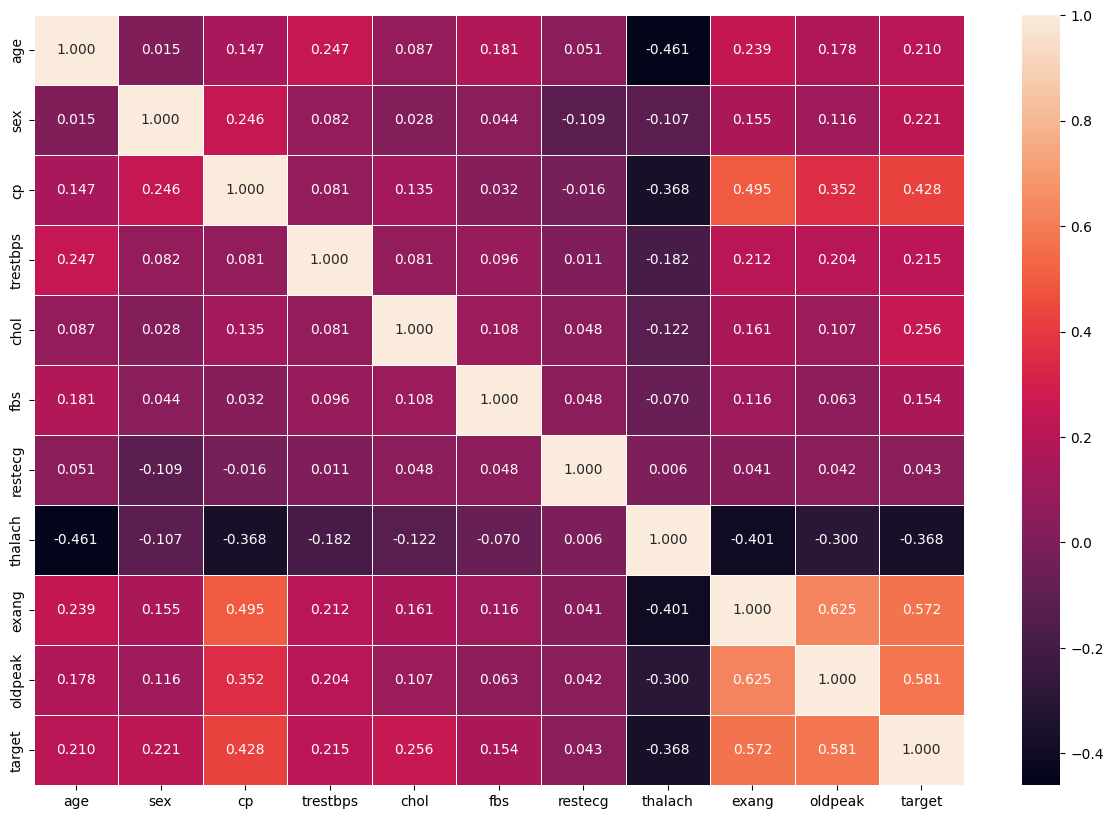

In [37]:
cor_mat = dfClean.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")

### 6. Konstruksi Data

Salah satu tujuannya yaitu menyesuaikan semua tipe data yang ada di dalam dataset. Namun, di tahap ini dataset sudah emiliki tipe data yang sesuai sehingga tidak perlu dilakukan penyesuaian kembali.

In [38]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    float64
 1   sex       293 non-null    float64
 2   cp        293 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      293 non-null    float64
 5   fbs       293 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   293 non-null    float64
 10  target    293 non-null    float64
dtypes: float64(11)
memory usage: 27.5 KB


In [39]:
dfClean.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


Setelah menyesuaikan tipe dataset, kita harus memisahkan antara fitur dan target lalu simpan kedalam variabel

In [40]:
X = dfClean.drop("target", axis=1).values   #axis=1 --> kolom
y = dfClean.iloc[:,-1]

Setelah fitur dan taerget dipisahkan, sebaiknya selanjutnya dilakukan pengecekan dulu persebaran jumlah targetnya

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '2.0'),
  Text(4, 0, '4.0')])

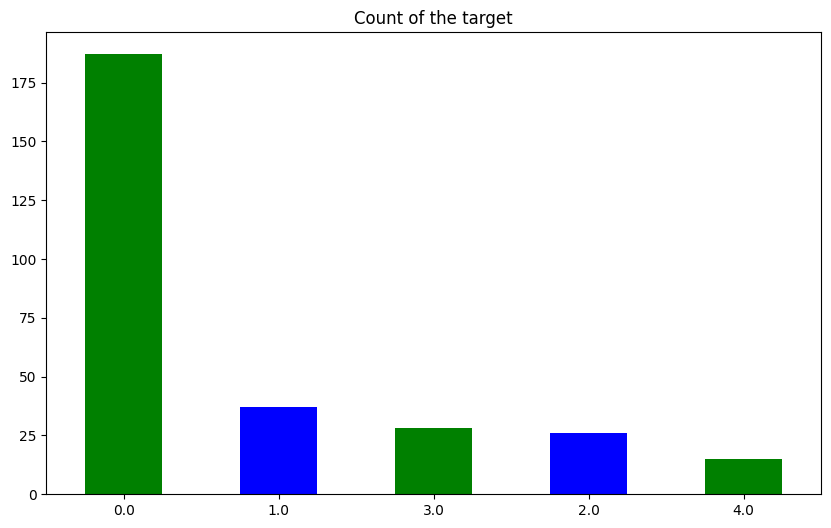

In [41]:
dfClean['target'].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("Count of the target")
plt.xticks(rotation=0)

Pada grafik dapat dilihat bahwa persebaran jumlah target tidak seimbang, maka perlu diseimbangkan. Caranya ada 2 yaitu undersampling dan oversampling. Oversampling digunakan kalau jumlah dataset sedikit, sedangkan undersampling dilakukan jika jumlah data terlalu banyak. Karena data yang kita miliki tidak banyak, maka dilakukan Oversampling. Salah satu metode oversampling yang akan digunakan yaitu SMOTE

In [42]:
from imblearn.over_sampling import SMOTE

In [43]:
# Oversampling
smote = SMOTE(random_state=42)
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y)

In [44]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

In [45]:
new_df1 = pd.DataFrame(data=y)

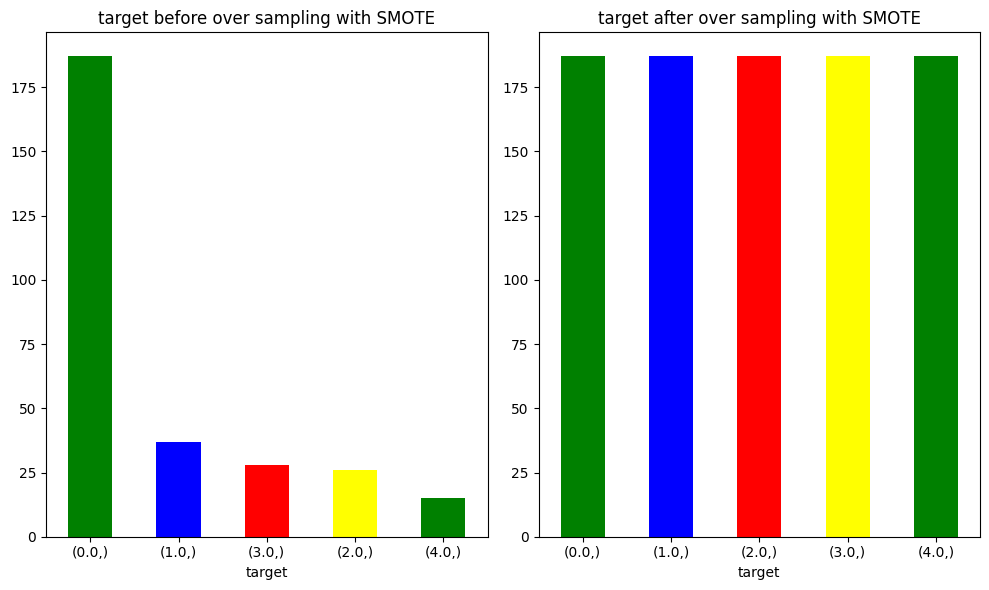

In [46]:
# before oversampling
plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow'])

plt.title("target before over sampling with SMOTE")
plt.xticks(rotation=0)

# after oversampling
plt.subplot(1, 2, 2)
new_df2 = pd.DataFrame(data=y_smote_resampled)

new_df2.value_counts().plot(kind='bar',figsize=(10,6), color=['green','blue','red','yellow'])
plt.title("target after over sampling with SMOTE")
plt.xticks(rotation=0)

# menampilkan kedua grafik
plt.tight_layout()
plt.show()

In [47]:
# cek
# before ovrsmplg
new_df1 = pd.DataFrame(data=y)
new_df1.value_counts()

target
0.0       187
1.0        37
3.0        28
2.0        26
4.0        15
dtype: int64

In [48]:
# after ovrsmplg
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts()

target
0.0       187
1.0       187
2.0       187
3.0       187
4.0       187
dtype: int64

Setelah seimbang persebaran jumlah targetnya, selanjutya dilakukan pengecekan apakah perlu dilakukan normalisasi/standarisasi pada dataset kita

In [49]:
dfClean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,47.822526,0.726962,2.986348,132.662116,250.860068,0.068259,0.218430,139.058020,0.303754,0.588055,0.795222
std,7.824875,0.446282,0.965049,17.576793,65.059069,0.252622,0.460868,23.558003,0.460665,0.909554,1.238251
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,248.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,4.000000


Pada deskripsi di atas, diketahui bahwa std(standar deviasi) setiap fitur memiliki rentang yang cukup jauh, sehingga perlu dilakukan normalisasi/standarisasi untuk memperkecil rentang antar std setiap kolom

In [50]:
# Normalisasi
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_smote_resampled_normal = scaler.fit_transform(X_smote_resampled)

len(X_smote_resampled_normal)

935

In [51]:
dfcek1 = pd.DataFrame(X_smote_resampled_normal)
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.563739,0.842507,0.818224,0.403413,0.341027,0.094277,0.117938,0.453354,0.598398,0.227015
std,0.174873,0.332492,0.274211,0.147493,0.110990,0.252030,0.199527,0.197232,0.450288,0.201293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.473283,1.000000,0.666667,0.305556,0.267954,0.000000,0.000000,0.312720,0.000000,0.000000
50%,0.578947,1.000000,1.000000,0.387952,0.330240,0.000000,0.000000,0.440606,0.962447,0.200000
75%,0.683363,1.000000,1.000000,0.487481,0.393811,0.000000,0.201473,0.593629,1.000000,0.386166
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Setelah normalisasi selesai, selanjutnya membagi fitur dan target menjadi data train dan data test

In [52]:
from sklearn.model_selection import train_test_split

# membagi fitur dan target menjadi data train test (hanya yang oversample saja)
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42, stratify = y_smote_resampled)

# membagi fitur dan target menjadi data train test (oversample + normalization)
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_smote_resampled_normal, y_smote_resampled, test_size=0.2, random_state=42, stratify = y_smote_resampled)


### 7. Model

Pada tahap ini mulai membangun model

Menampilkan hasil akurasi dan rata-rata dari recall, f1 score dan precission score dari setiap model. Fungsi ini akan dipanggil di setiap model, pembangunan fungsi ini bersifat opsional

In [53]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix, precision_score

def evaluation(Y_test, Y_pred):
  acc = accuracy_score(Y_test, Y_pred)
  rcl = recall_score(Y_test, Y_pred,average = 'weighted')
  f1 = f1_score(Y_test, Y_pred,average = 'weighted')
  ps = precision_score(Y_test, Y_pred,average = 'weighted')

  metric_dict={'accuracy': round(acc,3),
               'recall' : round(rcl,3),
               'F1 score' : round(f1,3),
               'Precision score' : round(ps,3)
               }

  return print(metric_dict)

## **Oversample**

### KNN

Membangun model dengan algoritma KNN, dengan nilai neighbors 3.

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [55]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Di bawah ini adalah kode program untuk menampilkan hasil akurasi dengan KNN

In [56]:
y_pred_knn = knn_model.predict(X_test)

# evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model :")
accuracy_knn_smote =round(accuracy_score(y_test,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors (KNN) Model :
Accuracy: 0.754
Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.39      0.49        38
         1.0       0.73      0.81      0.77        37
         2.0       0.80      0.86      0.83        37
         3.0       0.77      0.87      0.81        38
         4.0       0.78      0.84      0.81        37

    accuracy                           0.75       187
   macro avg       0.75      0.76      0.74       187
weighted avg       0.74      0.75      0.74       187



In [57]:
evaluation(y_test, y_pred_knn)

{'accuracy': 0.754, 'recall': 0.754, 'F1 score': 0.741, 'Precision score': 0.745}


Pada visualisasi ini ditampilkan visualisasi confussion matrix untuk membandingkan hasil prediksi model dengan nilai sebenarnya

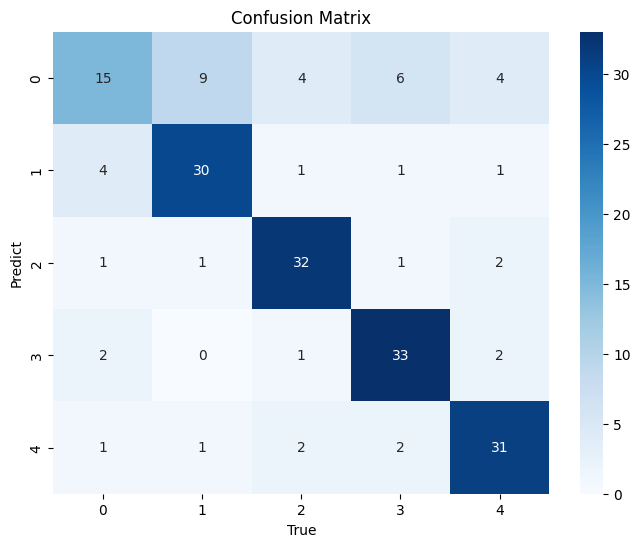

In [58]:
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### Random Forest

Selanjutnya membangun model dengan algoritma random forest dengan n_estimation yaitu 100, n_estimators sendiri berguna mengatur jumlah pohon keputusan yang akan dibangun

In [59]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [60]:
y_pred_rf =rf_model.predict(X_test)

# Evaluate the Rndom Forest model
print("Random Forest Model :")
accuracy_rf_smote =round(accuracy_score(y_test,y_pred_rf),3)
print("Accuracy:", accuracy_rf_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Model :
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [61]:
evaluation(y_test,y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.922}


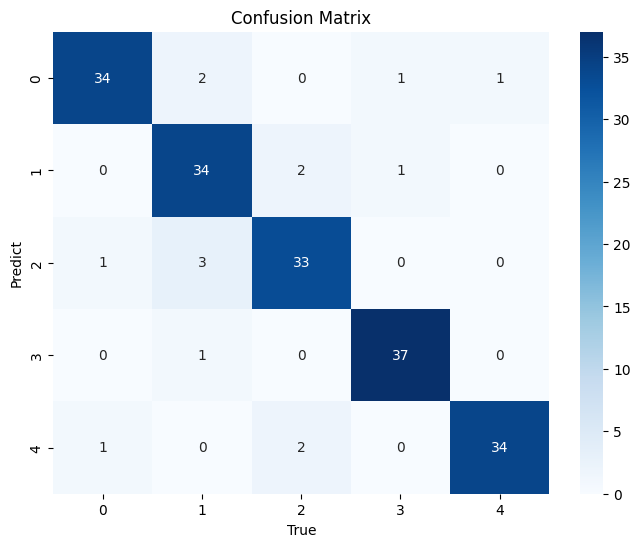

In [62]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### XGBoost

Dalam membangun model ini, akan digunakan algoritma XGBoost dengan learnig rate 0.1. Fungsi learning rate adalah untuk mengontrol seberapa besar kita menyesuaikan bobot model

In [63]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [64]:
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
print("XGBoost Model :")
accuracy_xgb_smote =round(accuracy_score(y_test,y_pred_xgb),3)
print("Accuracy:", accuracy_xgb_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Model :
Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [65]:
evaluation(y_test, y_pred_xgb)

{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.904, 'Precision score': 0.906}


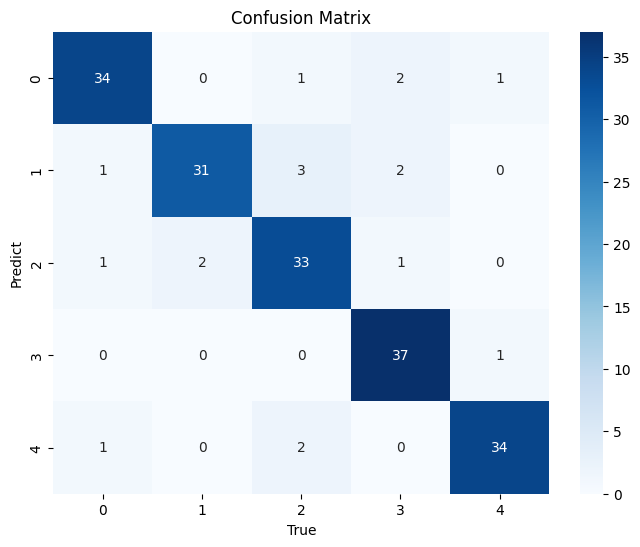

In [66]:
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

## **Oversample + Normalisasi**

Menggunakan data yang telah dilakukan oversampling + normalisasi untuk membangun model. Algoritma yang dipakai sama : KNN, RF dan XGB

### KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [68]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train_normal, y_train_normal)

KNeighborsClassifier(n_neighbors=3)

In [69]:
y_pred_knn = knn_model.predict(X_test_normal)

# evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model :")
accuracy_knn_smote_normal =round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model :
Accuracy: 0.861
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.76      0.82        38
         1.0       0.78      0.84      0.81        37
         2.0       0.87      0.92      0.89        37
         3.0       0.92      0.87      0.89        38
         4.0       0.87      0.92      0.89        37

    accuracy                           0.86       187
   macro avg       0.86      0.86      0.86       187
weighted avg       0.86      0.86      0.86       187



In [70]:
evaluation(y_test_normal, y_pred_knn)

{'accuracy': 0.861, 'recall': 0.861, 'F1 score': 0.861, 'Precision score': 0.863}


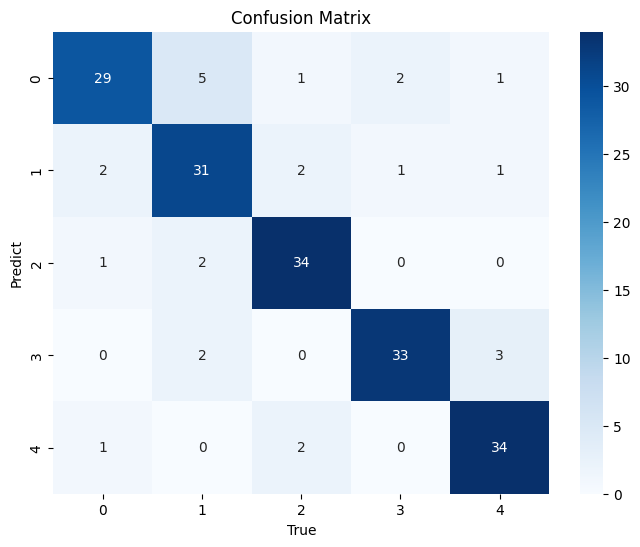

In [71]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### Random Forest

In [72]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_normal, y_train_normal)

RandomForestClassifier(random_state=42)

In [73]:
y_pred_rf =rf_model.predict(X_test_normal)

# Evaluate the Rndom Forest model
print("Random Forest Model :")
accuracy_rf_smote_normal =round(accuracy_score(y_test_normal,y_pred_rf),3)
print("Accuracy:", accuracy_rf_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))

Random Forest Model :
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [74]:
evaluation(y_test_normal,y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.922}


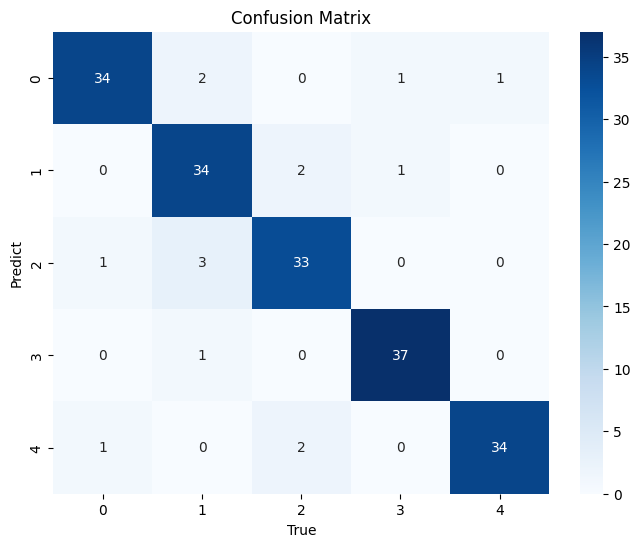

In [75]:
cm = confusion_matrix(y_test_normal, y_pred_rf)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### XGBoost

In [76]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train_normal, y_train_normal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [77]:
y_pred_xgb = xgb_model.predict(X_test_normal)

# Evaluate the XGBoost model
print("XGBoost Model :")
accuracy_xgb_smote_normal =round(accuracy_score(y_test_normal,y_pred_xgb),3)
print("Accuracy:", accuracy_xgb_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))

XGBoost Model :
Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [78]:
evaluation(y_test_normal, y_pred_xgb)

{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.904, 'Precision score': 0.906}


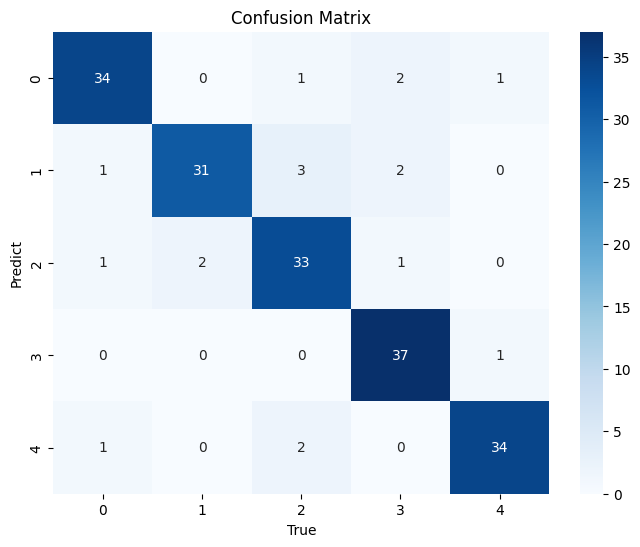

In [79]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### **Tunning + Normalization + Oversample**

Data yang digunakan yang telah dilakukan tunning parameter, normalisasi dan oversample

### KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

Setiap parameter tunning tidak selalu sama, karena bergantung pada algoritma yang digunakan.

In [81]:
knn_model = KNeighborsClassifier()

param_grid = {
    "n_neighbors" : range(3, 21),
    "metric" : ["euclidean", "manhattan", "chebyshev"],
    "weights" : ["uniform", "distance"],
    "algorithm" : ["auto", "ball_tree", "kd_tree"],
    "leaf_size" : range(10, 61),
}

In [82]:
knn_model = RandomizedSearchCV(estimator=knn_model, param_distributions=param_grid, n_iter=100, scoring="accuracy", cv=5)

In [83]:
knn_model.fit(X_train_normal, y_train_normal)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree'],
                                        'leaf_size': range(10, 61),
                                        'metric': ['euclidean', 'manhattan',
                                                   'chebyshev'],
                                        'n_neighbors': range(3, 21),
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [84]:
best_params = knn_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan', 'leaf_size': 18, 'algorithm': 'ball_tree'}


In [85]:
y_pred_knn = knn_model.predict(X_test_normal)

# evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model :")
accuracy_knn_smote_normal_Tun =round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model :
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.84      0.90        38
         1.0       0.80      0.86      0.83        37
         2.0       0.92      0.95      0.93        37
         3.0       0.97      0.95      0.96        38
         4.0       0.95      1.00      0.97        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [86]:
evaluation(y_test_normal, y_pred_knn)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.923}


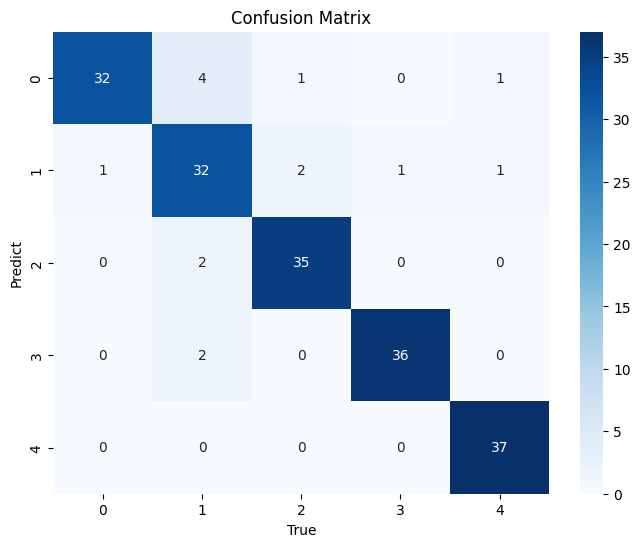

In [87]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### Random Forest

In [88]:
rf_model = RandomForestClassifier()

param_grid = {
    "n_estimators" : [100, 200],
    "max_depth" : [10, 15],
    "min_samples_leaf" : [1,2],
    "min_samples_split": [2,5],
    "max_features" : ["sqrt","log2"],
    # "random_state" : [42, 100, 200]
}

rf_model = RandomizedSearchCV(rf_model, param_grid, n_iter=100, cv=5, n_jobs=-1)

rf_model.fit(X_train_normal, y_train_normal)

best_params = rf_model.best_params_

print(f"Best parameters: {best_params}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 15}


In [89]:
y_pred_rf =rf_model.predict(X_test_normal)

# Evaluate the Rndom Forest model
print("Random Forest Model :")
accuracy_rf_smote_normal_Tun =round(accuracy_score(y_test_normal,y_pred_rf),3)
print("Accuracy:", accuracy_rf_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))

Random Forest Model :
Accuracy: 0.914
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93        38
         1.0       0.87      0.89      0.88        37
         2.0       0.87      0.89      0.88        37
         3.0       0.92      0.95      0.94        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.91       187
   macro avg       0.92      0.91      0.91       187
weighted avg       0.92      0.91      0.91       187



In [90]:
evaluation(y_test_normal,y_pred_rf)

{'accuracy': 0.914, 'recall': 0.914, 'F1 score': 0.915, 'Precision score': 0.916}


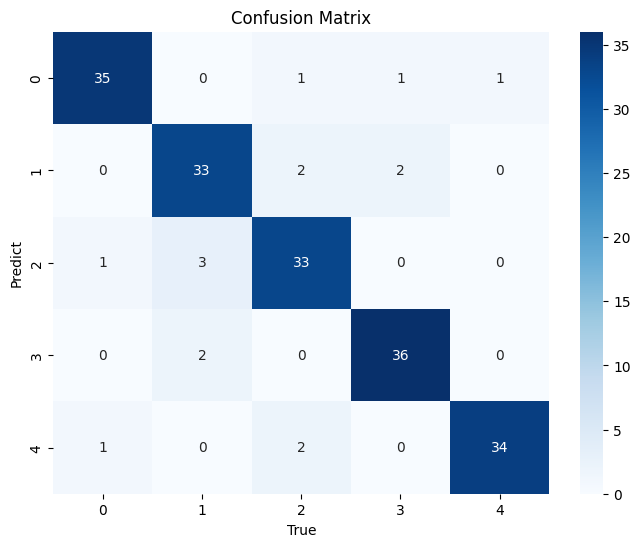

In [91]:
cm = confusion_matrix(y_test_normal, y_pred_rf)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### XGBoost

In [92]:
xgb_model = XGBClassifier()

param_grid = {
    "max_depth" : [3, 5, 7],
    "learning_rate" : [0.01, 0.1],
    "n_estimators" : [100, 200],
    "gamma" : [0, 0.1],
    "colsample_bytree" : [0.7, 0.8],
}

xgb_model = RandomizedSearchCV(xgb_model, param_grid, n_iter=10, cv=5, n_jobs=-1)

xgb_model.fit(X_train_normal, y_train_normal)

best_params = xgb_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}


In [93]:
y_pred_xgb = xgb_model.predict(X_test_normal)

# Evaluate the XGBoost model
print("XGBoost Model :")
accuracy_xgb_smote_normal_Tun =round(accuracy_score(y_test_normal,y_pred_xgb),3)
print("Accuracy:", accuracy_xgb_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))

XGBoost Model :
Accuracy: 0.914
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90        38
         1.0       0.91      0.84      0.87        37
         2.0       0.89      0.89      0.89        37
         3.0       0.93      1.00      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.91       187
   macro avg       0.92      0.91      0.91       187
weighted avg       0.92      0.91      0.91       187



In [94]:
evaluation(y_test_normal, y_pred_xgb)

{'accuracy': 0.914, 'recall': 0.914, 'F1 score': 0.914, 'Precision score': 0.915}


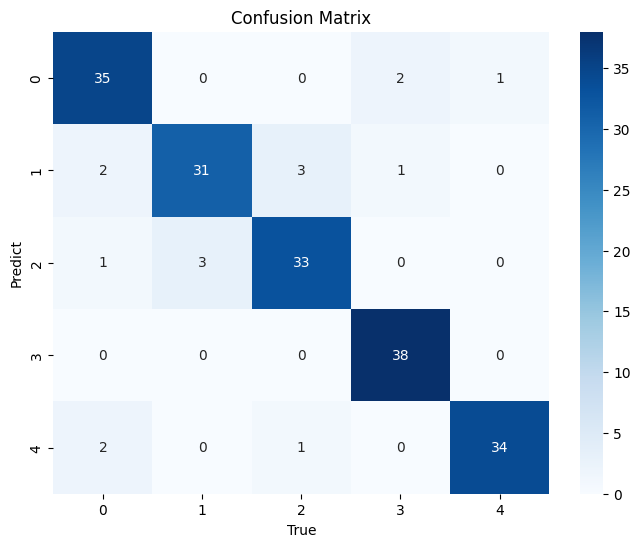

In [95]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### 8. Evaluasi

Selanjutnya melakukan evaluasi data sekaligus membandingkanantar algoritma dengan tujuan mengetahui jenis model algoritma dengan akurasi terbaik

In [96]:
import matplotlib.pyplot as plt

In [97]:
model_comp1 = pd.DataFrame({'Model':['K-Nearest Neighbour', 'Random Forest',
                                     'XGBoost'], 'Accuracy': [accuracy_knn_smote*100,
                                                              accuracy_rf_smote*100,accuracy_xgb_smote*100]})

In [98]:
model_comp1.head()

,Model,Accuracy
0,K-Nearest Neighbour,75.4
1,Random Forest,92.0
2,XGBoost,90.4


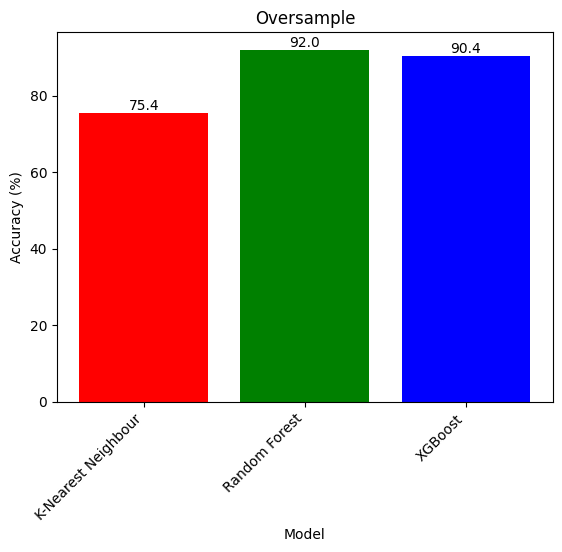

In [99]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['red', 'green','blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample')
plt.xticks(rotation=45, ha='right')     # untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval,2), ha='center', va='bottom')

plt.show()

In [100]:
model_comp2 = pd.DataFrame({'Model':['K-Nearest Neighbour','Random Forest',
                                     'XGBoost'], 'Accuracy': [accuracy_knn_smote_normal*100,
                                                              accuracy_rf_smote_normal*100,accuracy_xgb_smote_normal*100]})

model_comp2.head()

,Model,Accuracy
0,K-Nearest Neighbour,86.1
1,Random Forest,92.0
2,XGBoost,90.4


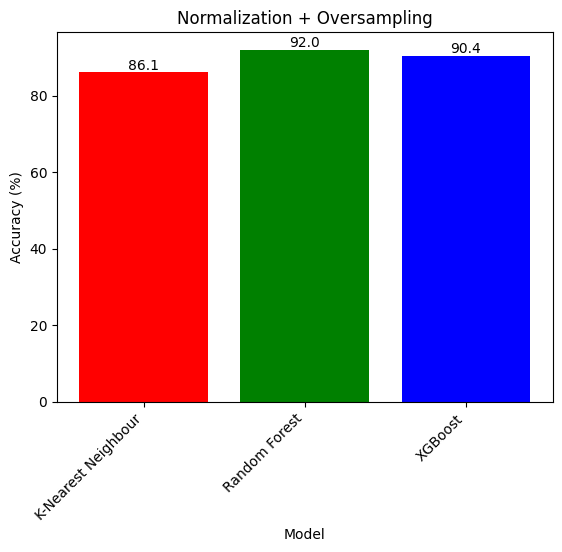

In [101]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp2['Model'], model_comp2['Accuracy'], color=['red','green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling')
plt.xticks(rotation=45, ha='right')     # untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval,2), ha='center', va='bottom')

plt.show()

In [102]:
model_comp3 = pd.DataFrame({'Model':['K-Nearest Neighbour','Random Forest',
                                     'XGBoost'], 'Accuracy': [accuracy_knn_smote_normal_Tun*100,                                                              accuracy_rf_smote_normal_Tun*100, accuracy_xgb_smote_normal_Tun*100]
                                      })

model_comp3.head()

,Model,Accuracy
0,K-Nearest Neighbour,92.0
1,Random Forest,91.4
2,XGBoost,91.4


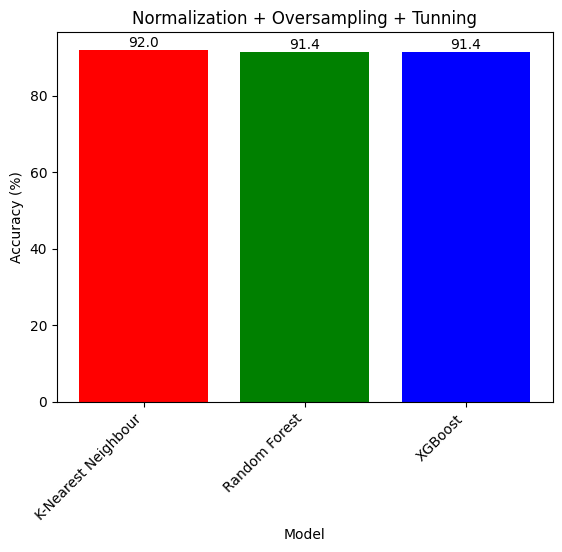

In [103]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp3['Model'], model_comp3['Accuracy'], color=['red','green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling + Tunning')
plt.xticks(rotation=45, ha='right')     # untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval,2), ha='center', va='bottom')

plt.show()

In [104]:
# Data Frame
model_compBest = pd.DataFrame({
    'Model' : ['K-Nearest Neigbour Oversample Tunning', 'Random Forest Oversample',
               'XGB Oversample Standarization Tunning'],
    'Accuracy' : [accuracy_knn_smote_normal_Tun*100, accuracy_rf_smote_normal_Tun*100,
                  accuracy_xgb_smote_normal_Tun*100]
})

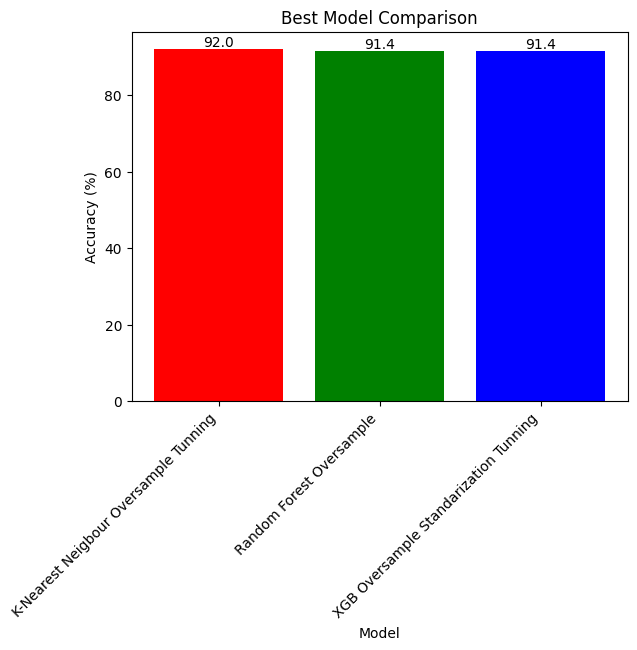

In [105]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_compBest['Model'], model_compBest['Accuracy'], color=['red','green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Best Model Comparison')
plt.xticks(rotation=45, ha='right')     # untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval,2), ha='center', va='bottom')

plt.show()

## 9. Streamlit

## 10. Kesimpulan

Dari eksperimen yang telah dilakukan dengan melakukan percobaan menggunakan algoritma KNN, Random Forest dan XGBoost dengan beberapa penanganan data yaitu random over sampling SMOTE untuk mengatasi imbalance data, RandomSearchCV untuk melakukan tunning dan MinMaxScaler untuk normalisasi data. Hasil yang didapatkan sebagai berikut :

1. Data yang di-oversampling dengan SMOTE
, Model terbaik yang diperoleh yaitu Random Forest dengan akurasi senilai 92.0%, kemudian XGBoost 90.4% dan KNN 75.4%.

2. Data yang di-oversampling(SMOTE) dan normalisasi(MinMaxScaler),
Model terbaik yang diperoleh yaitu Random Forest dengan akurasi senilai 92.0%, kemudian XGBoost 90.4% dan KNN 86.1%.

3. Data di-oversampling(SMOTE), normalisasi(MinMaxScaler) dan tunning parameter(RandomizedSearchCV),
Model terbaik yang diperoleh yaitu KNN dengan akurasi senilai 92.0%, kemudian XGBoost 91.4% dan Random Forest 91.4%.

Dari hasil yang diperoleh diatas, dapat disimpulkan bahwa kondisi data yang berbeda-beda berpengaruh terhadap akurasi model, contohnya seperti pada algoritma KNN diatas yang akurasinya meningkat pesat ketika menggunakan data yang dilakukan oversampling(SMOTE), normalisasi(MinMaxScaler) dan tunning parameter(RandomizedSearchCV). Sedangkan untuk model terbaik ada pada akurasi 92.0%, yaitu pada algoritma Random Forest(data 1 &2) dan KNN(data 3)

### NOTE

Note :
- jabarkan jadi 9 kode ini
- ada format fix me
- menjelaskan heatmap


5 metode :
ML -->
- supervised : klasifikasi, prediksi/forecaseting, regresi/estimasi
- unsupervised : clustering, assosiation learning
- reinforcement learning : NLP --> RNN, LSTM, Transformer, LLM

ML >> Artificial Neural Network >> training testing


Label, target, output, tujuan, class (sama)

Peran utama data mining :
- estimasi
- forcaseting
- association
- klasifikasi
- clustering

kategorikal/nominal(yes/no, 0/1), numerik (yg bisa dibuat perhitungan matematika/aritmatika)

Attribute,feature,dimension (sama)

KNN : regresi & klasifikasi
mainkan activation function, ANN bisa dipakai
sigmoid --> bisa jadi estimasi atau regresi


Heatmap :
hubungan atau korelasi


NORMALISASI???


SMOTE : membangkitkan data yang mirip sama data sebelumnya, mencegah overfitting, dengan meliat rentang max-min, Generative AI yg baru bisa nandingin
augmentation


ada data yang ga kompleks, polanya gabisa dibentuk dengan baik


Tunning, pencarian atribut yg terbaik? mana k yg terbaik kalo di KNN?


variansi tinggi bias rendah --> butuh
pakai klasifier sendiri, data 1 2 3
ansamble
random forest ansamble bagging, dipilih decision tree terbaik
- bagging
- stacking
- boosting
- vooting
- SG Boost?

apakah melakukan data balancing harus selalu dilakukan, tadi ada contoh jumlah datanya beda sedikit

Kelas teguh
pak junta

flask, tkinter, streamlit, django
PICKLE ditarik ke streamlit



